In [2]:
########## Imports ##########

import numpy as np
import pandas as pd
from packages import fonctions

# Représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import re
#from Levenshtein import *
import pickle
import os

# Outliers
from sklearn.ensemble import IsolationForest

# Import the tokenizer of NLTK
import nltk

# à télécharger une fois :
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Warnings
import warnings
warnings.simplefilter(action = 'ignore')

# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)

In [ ]:
# Choix d'une palette de couleurs

sns.set_palette('Set2', color_codes = True)
print(sns.color_palette('Set2').as_hex())
# palettes testées : 'Spectral', 'flare', 'twilight', 'husl', 'Set1', 'Set2', 'Set3'
sns.color_palette()

In [3]:
########## Import données csv ##########
# dossier data hors du dossier code pour ne pas l'importer dans github

df = pd.read_csv('../data/Flipkart/flipkart_com-ecommerce_sample_1050.csv')
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


### EDA

In [4]:
df.shape

(1050, 15)

In [5]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [10]:
########## Duplicats ##########

fonctions.remove_duplicates(df)

********** Détection des doublons **********

Nombre de duplicats dans le jeu de données = 0


********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 341

Pourcentage de valeurs manquantes : 2.17


Valeurs manquantes par colonne : 



,Nombres de valeurs manquantes,% de valeurs manquantes
brand,338,32.19
retail_price,1,0.10
discounted_price,1,0.10
product_specifications,1,0.10



Heatmap des valeurs manquantes : 



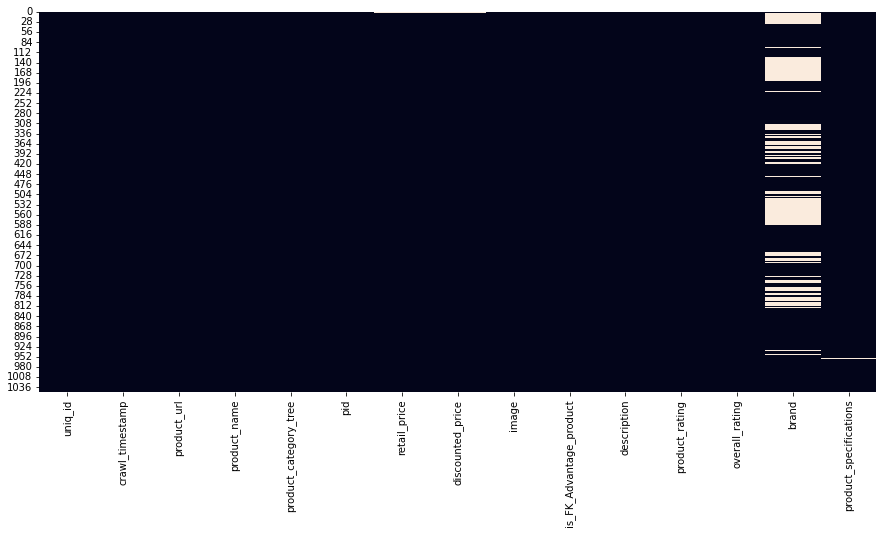

In [8]:
########## Valeurs manquantes ##########

# Identification des valeurs manquantes par variable :
fonctions.nan_detection(df)

# -> nombreuses pour 'brand' (30%)
# -> peu nombreuses pour 'retail_price', 'discounted_price', 'product_specifications' (1 seule valeur manquante)

# est-ce pour la même ligne ?

In [9]:
df.loc[df['retail_price'].isna()]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."


In [32]:
# même ligne pour retail_price et discounted_price mais pas pour product_specifications

########## Gestion des valeurs manquantes ##########
# -> drop des deux lignes pour lesquelles on a 1 valeur manquante pour les 3 variables
# -> drop de la feature 'brand' ?

df.drop(['brand'], axis = 1, inplace = True)

In [33]:
df.dropna(inplace = True)

In [34]:
fonctions.nan_detection(df)

********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 0


In [35]:
########## uniq_id ###########
# id uniques

df['uniq_id'].nunique()

1048

In [36]:
########## crawl_timestamp ##########
df['crawl_timestamp']

0       2016-04-30 03:22:56 +0000
1       2016-04-30 03:22:56 +0000
3       2016-06-20 08:49:52 +0000
4       2016-06-20 08:49:52 +0000
5       2015-12-04 07:25:36 +0000
                  ...            
1045    2015-12-01 10:15:43 +0000
1046    2015-12-01 10:15:43 +0000
1047    2015-12-01 10:15:43 +0000
1048    2015-12-01 10:15:43 +0000
1049    2015-12-01 10:15:43 +0000
Name: crawl_timestamp, Length: 1048, dtype: object

In [61]:
# to do -> modifier le format
df['crawl_timestamp'] = df['crawl_timestamp'].apply(lambda x : x.removesuffix(' +0000'))
df['crawl_timestamp']

0       2016-04-30 03:22:56
1       2016-04-30 03:22:56
3       2016-06-20 08:49:52
4       2016-06-20 08:49:52
6       2015-12-04 07:25:36
               ...         
1044    2015-12-01 10:15:43
1045    2015-12-01 10:15:43
1047    2015-12-01 10:15:43
1048    2015-12-01 10:15:43
1049    2015-12-01 10:15:43
Name: crawl_timestamp, Length: 936, dtype: object

In [62]:
########## product_url ##########
df['product_url'].nunique()

936

In [63]:
########## product_name ##########
df['product_name'].nunique()

936

In [64]:
########## product_category_tree ##########
df['product_category_tree'].nunique()

576

In [65]:
########## pid ##########
df['pid'].nunique()

936

In [66]:
########## retail_price ##########
df['retail_price'].nunique()

268

In [67]:
df['retail_price'].value_counts()

999.0     63
499.0     49
599.0     41
1499.0    31
799.0     25
          ..
598.0      1
1449.0     1
250.0      1
498.0      1
1190.0     1
Name: retail_price, Length: 268, dtype: int64

In [68]:
df['product_rating'].value_counts()

No rating available    797
5                       37
4                       19
3                       11
4.5                      9
1                        8
3.5                      7
4.3                      7
2                        6
3.7                      6
4.2                      4
4.1                      4
3.6                      3
3.8                      3
4.7                      3
4.8                      2
4.4                      2
2.3                      2
3.1                      1
3.9                      1
2.7                      1
3.3                      1
3.2                      1
1.5                      1
Name: product_rating, dtype: int64

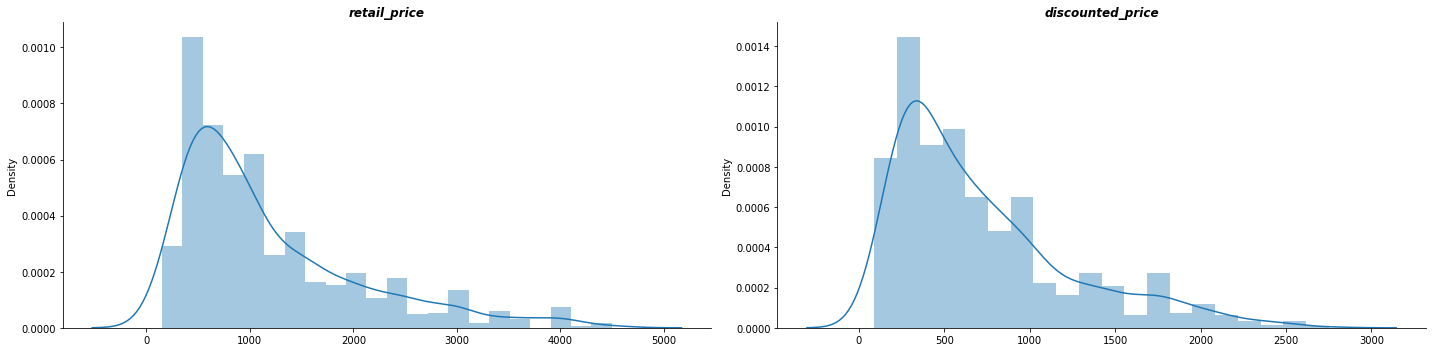

In [69]:
########## Analyse univariée ##########

# Displots des variables quantitatives
columns = df.select_dtypes(include = ['float64', 'int64']).columns
nb_lignes = len(columns)/4 # 4 = nb max de displots par lignes pour que ça soit lisible

figure = plt.figure(figsize = (20, 5))
for index, col in enumerate(columns):
    figure.add_subplot(int(np.ceil(nb_lignes)), 2, index + 1)
    sns.distplot(x = df[col])
    plt.title(col, fontweight = 'bold', fontstyle = 'italic')
    sns.despine() # pour enlever limites du graph en haut et à droite
    figure.tight_layout()
plt.show()

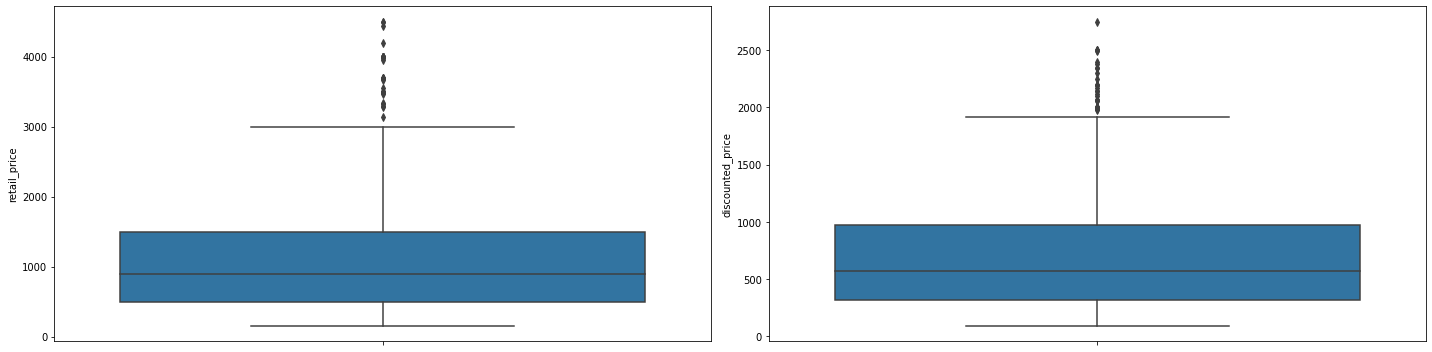

In [70]:
# Boxplots des variables quantitatives
columns = df.select_dtypes(include = ['float64', 'int64']).columns
nb_lignes = len(columns)/9 # 9 = nb max de boxplots par lignes pour que ça soit lisible

figure = plt.figure(figsize = (20, 5))
for index, col in enumerate(columns):
    figure.add_subplot(int(np.ceil(nb_lignes)), 2, index + 1)
    sns.boxplot(y = col, data = df)
figure.tight_layout()
plt.show()

In [48]:
########## Outliers ##########

# prérequis -> plus de nan

# la présence d'outliers a été detecté grâce aux analyses précedantes (cf cartes, boxplots...)
# utiliser l'Isolation Forest et supprimer lignes/valeurs correspondantes
clf = IsolationForest()
preds = clf.fit_predict(df.select_dtypes(include = ['float64']))
preds

array([1, 1, 1, ..., 1, 1, 1])

In [49]:
# anomalies ont un score de -1 : les supprimer
df.drop(df.iloc[np.where(preds == -1)[0]].index, inplace = True)

df.shape

(936, 14)

In [ ]:
########## Analyse univariée ##########

# Displots des variables quantitatives
columns = df.select_dtypes(include = ['float64', 'int64']).columns
nb_lignes = len(columns)/4 # 4 = nb max de displots par lignes pour que ça soit lisible

figure = plt.figure(figsize = (20, 5))
for index, col in enumerate(columns):
    figure.add_subplot(int(np.ceil(nb_lignes)), 2, index + 1)
    sns.distplot(x = df[col])
    plt.title(col, fontweight = 'bold', fontstyle = 'italic')
    sns.despine() # pour enlever limites du graph en haut et à droite
    figure.tight_layout()
plt.show()

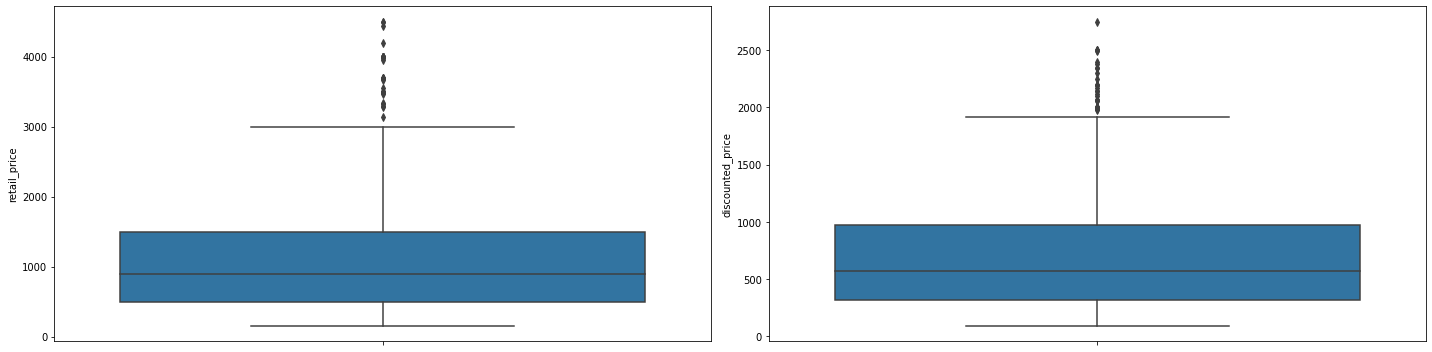

In [50]:
# Boxplots des variables quantitatives
columns = df.select_dtypes(include = ['float64', 'int64']).columns
nb_lignes = len(columns)/9 # 9 = nb max de boxplots par lignes pour que ça soit lisible

figure = plt.figure(figsize = (20, 5))
for index, col in enumerate(columns):
    figure.add_subplot(int(np.ceil(nb_lignes)), 2, index + 1)
    sns.boxplot(y = col, data = df)
figure.tight_layout()
plt.show()

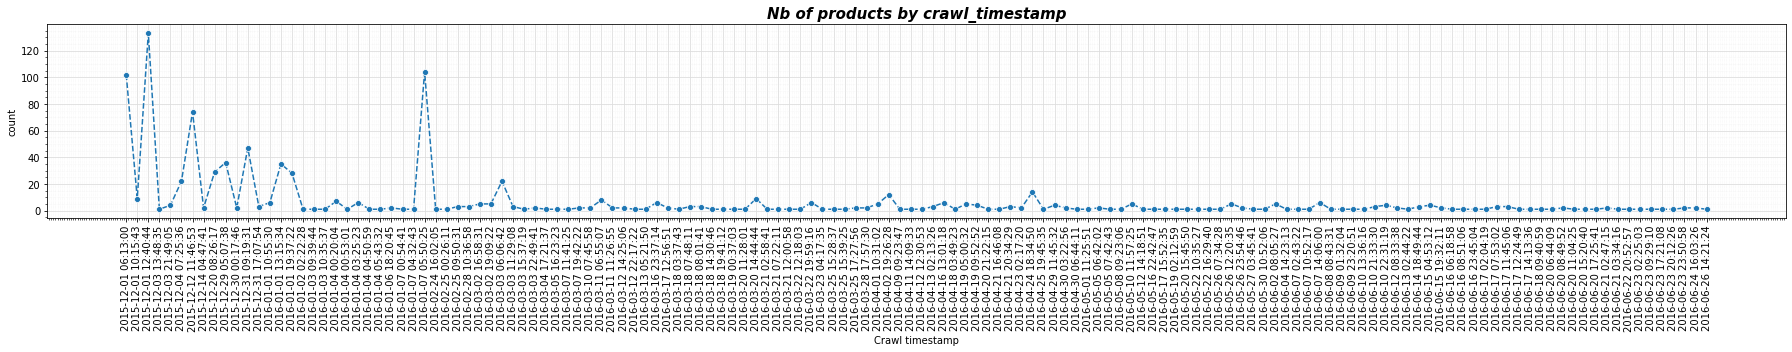

In [71]:
## evolution du nb de commandes par année

plt.figure(figsize = (25, 5))
sns.lineplot(
    x = df.groupby('crawl_timestamp')['uniq_id'].count().index,
    y = df.groupby('crawl_timestamp')['uniq_id'].count().values,
    marker = 'o',
    linestyle = '--'
    )
plt.title('Nb of products by crawl_timestamp', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.xlabel('Crawl timestamp')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [74]:
# enlever heure ?
from datetime import datetime
df['crawl_timestamp'] = df['crawl_timestamp'].apply(lambda x : datetime.strptime(x , '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d'))
df['crawl_timestamp']

0       2016-04-30
1       2016-04-30
3       2016-06-20
4       2016-06-20
6       2015-12-04
           ...    
1044    2015-12-01
1045    2015-12-01
1047    2015-12-01
1048    2015-12-01
1049    2015-12-01
Name: crawl_timestamp, Length: 936, dtype: object

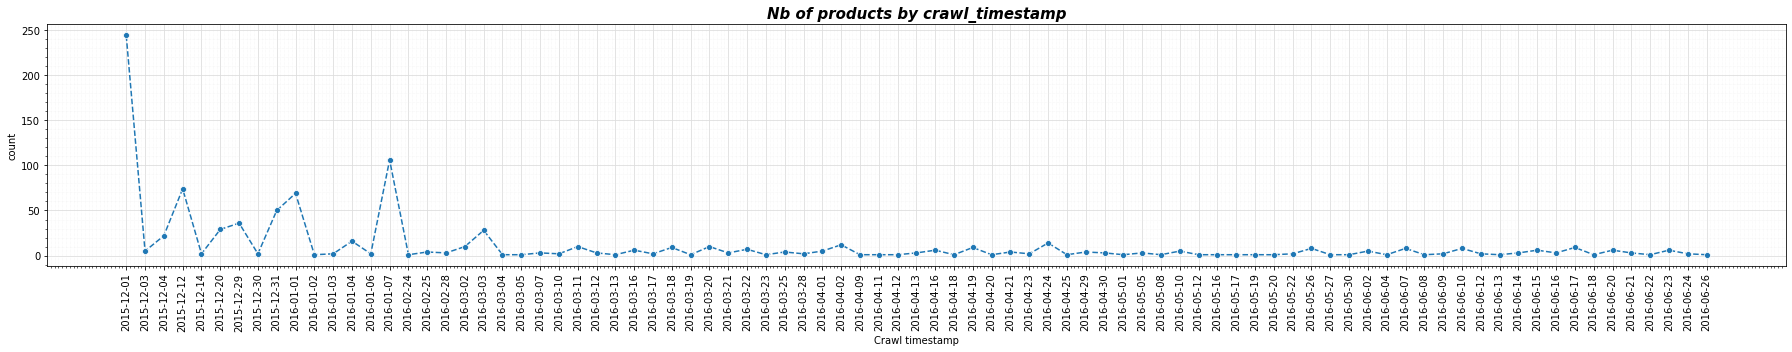

In [75]:
## evolution du nb de commandes par année

plt.figure(figsize = (25, 5))
sns.lineplot(
    x = df.groupby('crawl_timestamp')['uniq_id'].count().index,
    y = df.groupby('crawl_timestamp')['uniq_id'].count().values,
    marker = 'o',
    linestyle = '--'
    )
plt.title('Nb of products by crawl_timestamp', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.xlabel('Crawl timestamp')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

### Text analysis

In [ ]:
########## Analyse du texte ##########

# librairies
# -> NLTK
# -> Spacy

# Regex cheatsheet -> https://www.debuggex.com/cheatsheet/regex/python

# recap cours
# token, retirer stopwords, stemming/lemmatization (supprimer suffixes et préfixes)

In [ ]:
#Voici les contraintes : 

# Afin d’extraire les features texte, il sera nécessaire de mettre en œuvre : 
# - deux approches de type “bag-of-words”, comptage simple de mots et Tf-idf ;
# - une approche de type word/sentence embedding classique avec Word2Vec (ou Glove ou FastText) ;
# - une approche de type word/sentence embedding avec BERT ;
# - une approche de type word/sentence embedding avec USE (Universal Sentence Encoder). 

In [ ]:
df['product_specifications'][0]

In [ ]:
df['product_specifications'][0].replace('=>', ':').replace('{"product_specification":', '')

In [ ]:
print(re.findall(r"\w+", df['product_specifications'][0]))

In [ ]:
df['product_category_tree'][0]

In [ ]:
print(re.findall(r"\w+", df['product_category_tree'][0]))

In [ ]:
df['product_name'][0]

In [ ]:
########## Découper la variable 'product_category_tree' pour isoler catégorie, sous catégorie et soussouscatégorie ##########

In [ ]:
import re

sentence = '["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

match = re.search(r'(?:\w+\s+){2}(?=\>\>)', sentence)

if match:
    result = match.group(0).strip()
    print(result)

In [ ]:
########## Catégorie ##########
def get_category(row):
    match = re.search(r'(?:\w+\s+){2}(?=\>\>)', row['product_category_tree'])
    if match:
        result = match.group(0).strip()
        return result
    
df['category'] = df.apply(get_category, axis = 1)
df['category']


In [ ]:
df['category'].value_counts()

In [ ]:
# Labels sur graphs (fonction à mettre dans package)
def addlabels(x, y):
    """ Fonction pour ajouter valeurs sur graphs """
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center', fontstyle = 'italic')

In [ ]:
plt.figure(figsize = (20, 5))
sns.barplot(
    x = df['category'].value_counts().index,
    y = df['category'].value_counts().values
    )
addlabels(x = df['category'].value_counts().index, y = df['category'].value_counts().values)
plt.xticks(rotation = 45)
plt.title('Nombre de produit par catégorie', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [ ]:
########## Sous-catégorie ##########
def get_sous_category(row):
    match = re.search(r'(?<= >> )([^>>]+)', row['product_category_tree'])

    if match:
        result = match.group(1).strip()
        return result

df['sous_category'] = df.apply(get_sous_category, axis = 1)
df['sous_category']

In [ ]:
plt.figure(figsize = (20, 5))
sns.barplot(
    x = df['sous_category'].value_counts()[:30].index,
    y = df['sous_category'].value_counts()[:30].values
    )
addlabels(x = df['sous_category'].value_counts().index[:30], y = df['sous_category'].value_counts().values[:30])
plt.xticks(rotation = 45)
plt.title('Nombre de produit par sous-catégorie (30 plus importantes)', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [ ]:
########## Sous-ensemble ##########
def get_sous_ensemble(row):
    match = re.search(r'(?<= >> )(\w+)', row['product_category_tree'])

    if match:
        result = match.group(1).strip()
        return result

df['sous_ensemble'] = df.apply(get_sous_ensemble, axis = 1)
df['sous_ensemble']

In [ ]:
plt.figure(figsize = (20, 5))
sns.barplot(
    x = df['sous_ensemble'].value_counts()[:30].index,
    y = df['sous_ensemble'].value_counts()[:30].values
    )
addlabels(x = df['sous_ensemble'].value_counts().index[:30], y = df['sous_ensemble'].value_counts().values[:30])
plt.xticks(rotation = 45)
plt.title('Nombre de produit par sous-ensemble (30 plus importants)', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [ ]:
########## TEXT PROCESSING ##########

In [ ]:
def nlp_preprocessing(df, colonne, langue):
    
    """
    Fonction pour faire le preprocessing de la colonne d'un df
    - tokenizer
    - enlever ponctuation
    - mettre en minuscule
    - enlever stop words
    - stem
    - lemmatize
    
    df -> nom du dataframe sur lequel on travaille
    colonne -> nom de la colonne qu'on veut transformer (str)
    langue -> nom anglais de la langue correspondante ('french', 'spanish', 'english'...) (str)
    
    return -> df avec une colonne 'tokens' en plus correspondant au texte preprocessé
    
    """
    # tokenizer
    df['tokens'] = df[colonne].apply(word_tokenize)
    
    # enlever ponctuation
    df['tokens'] = df['tokens'].apply(lambda x: [item for item in x if item.isalpha()])
    
    # mettre en minuscule
    df['tokens'] = df['tokens'].apply(lambda x : [item.lower() for item in x])
    
    # enlever stop words
    stop = stopwords.words(langue)
    df['tokens'] = df['tokens'].apply(lambda x: [item for item in x if item not in stop])
    
    # Stem
    stemmer = PorterStemmer()
    df['stemmed'] = df['tokens'].apply(lambda x: [stemmer.stem(item) for item in x])

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    df['lemmatized'] = df['stemmed'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
    
    return df

#### PROBLEME avec ma fonction -> résultat sous forme de liste

In [ ]:
nlp_preprocessing(df, 'description', 'english')

In [ ]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

df['sentence_bow'] = df['description'].apply(lambda x : transform_bow_fct(x))
df['sentence_bow_lem'] = df['description'].apply(lambda x : transform_bow_lem_fct(x))
df['sentence_dl'] = df['description'].apply(lambda x : transform_dl_fct(x))
df.shape

In [ ]:
df

In [ ]:
########### BOW ##########
# = Bag of words
# -> vecteur qui garde l'information de combien de fois un mot est rencontré dans un texte donné

# Compute the BOW
from sklearn.feature_extraction.text import CountVectorizer
BOWvectorizer = CountVectorizer(stop_words = 'english')
BOW = BOWvectorizer.fit_transform(df['sentence_bow_lem']).toarray()
BOW = pd.DataFrame(data = BOW, columns = BOWvectorizer.get_feature_names())